In [3]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon import plotter
import matplotlib.pyplot as plt
import numpy as np

with MPRester("j1twApjMu9mGh9tITSd6") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961649")
    ph_struct = m.get_phonon_bandstructure_by_material_id("mp-961649")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



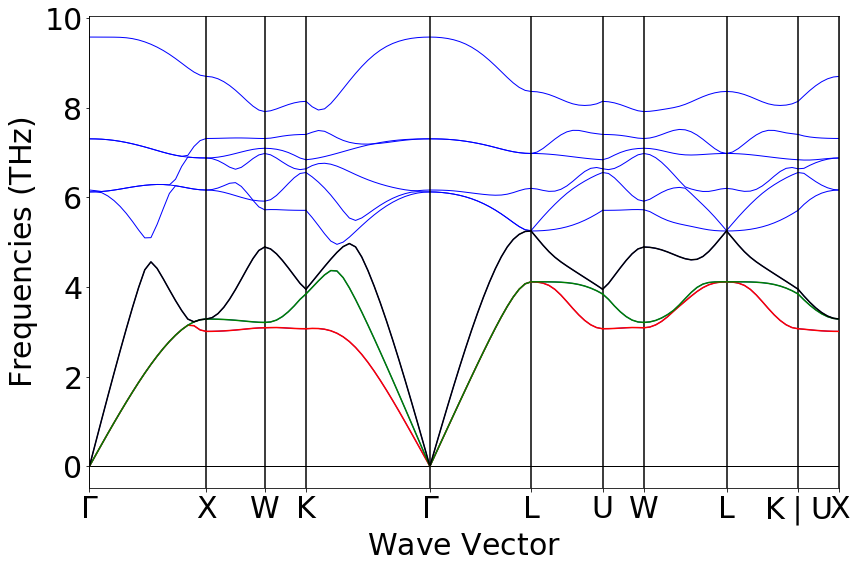

In [4]:
#Affichage de la structure de bande des phonons
ph_bandstruct_plt = plotter.PhononBSPlotter(ph_struct)

data = ph_bandstruct_plt.bs_plot_data()

absc = data.get('distances')
ordo = data.get('frequency')

ph_bandstruct_plt.get_plot()

# Affichage des trois branches acoustiques différentes pour lesquelles la vitesse du son sera calculée
for i in range(len(absc)):
    plt.plot(absc[i], ordo[i][0], color = 'red')
    plt.plot(absc[i], ordo[i][1], color = 'green')
    plt.plot(absc[i], ordo[i][2], color = 'black')

Les trois bandes acoustiques sélectionnées sont représentées en rouge, vert et noir.

In [6]:
# Définition de l'angström
ang = 10**(-10)

Formule utilisée : v_s = $\frac{\partial ω}{\partial q}$

In [15]:
#direction phi-X
#bande verte

x0 = absc[0][0]/ang
x1 = absc[0][1]/ang

y0 = 2*np.pi*ordo[0][1][0]*10**(12)
y1 = 2*np.pi*ordo[0][1][1]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la bande verte dans la direction phi-X vaut", vs, "m/s.\n")

#direction W-K
#bande rouge

x0 = absc[2][0]/ang
x1 = absc[2][1]/ang

y0 = 2*np.pi*ordo[2][0][0]*10**(12)
y1 = 2*np.pi*ordo[2][0][1]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche rouge dans la direction W-K vaut", vs, "m/s.\n")

#direction L-U
#bande noire

x0 = absc[5][0]/ang
x1 = absc[5][1]/ang

y0 = 2*np.pi*ordo[5][2][0]*10**(12)
y1 = 2*np.pi*ordo[5][2][1]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche noire dans la direction L-U vaut", vs, "m/s.\n")


La vitesse du son pour la bande verte dans la direction phi-X vaut 2814.312247324827 m/s.

La vitesse du son pour la branche rouge dans la direction W-K vaut 45.83596334258982 m/s.

La vitesse du son pour la branche noire dans la direction L-U vaut 1864.2454875628896 m/s.

